### SVM Classifiers for classification of open/close questions

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
openCloseData = pd.read_csv('openCloseData9.csv')

In [3]:
openCloseData.columns

Index(['Unnamed: 0', 'AboutMe', 'Body', 'Comment', 'Downvotes', 'Location',
       'PostId', 'ProfileImageUrl', 'Reputation', 'SOUrlCount', 'Tags',
       'Title', 'Unnamed: 0.1', 'Upvotes', 'UserId', 'Views', 'WebsiteUrl',
       'aboutMeFilled', 'bodyWordCount', 'closed', 'codeLength',
       'colemanLiauIndex', 'countOfInterrogativeSent',
       'daleChallReadabilityScore', 'experienceInTime', 'firstLineLength',
       'fleschReadingEase', 'gunningFog', 'locationFilled', 'lowerUpperRatio',
       'numAns', 'numPR', 'numPeopleReached', 'numQues',
       'profileImageUrlFilled', 'punctuationCount', 'sentenceCount',
       'sentencesStartWithICount', 'sentencesStartWithYouCount',
       'shortWordCount', 'smogIndex', 'tagCount', 'tagWeightSum',
       'titleLengthInChars', 'urlCount', 'userProfileFilled',
       'websiteUrlFilled'],
      dtype='object')

In [4]:
print(openCloseData.shape)
openCloseData.drop(['Unnamed: 0'],inplace=True,axis=1)
print(openCloseData.shape)

(159996, 47)
(159996, 46)


In [5]:
X = openCloseData.loc[:,['Reputation',
       'experienceInTime', 'Views',
       'Upvotes', 'Downvotes', 'tagCount', 'closed',
       'lowerUpperRatio', 'sentenceCount', 'firstLineLength', 'codeLength',
       'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'tagWeightSum', 'gunningFog',
       'fleschReadingEase', 'daleChallReadabilityScore', 'smogIndex',
       'colemanLiauIndex', 'userProfileFilled', 'numAns', 'numQues'] ]


X.replace(np.nan,0,inplace=True)  #replacing NaN to 0
X.lowerUpperRatio.replace(np.inf,0,inplace=True)  #replacing infinity to 0
print(X.shape)
print(type(X))

(159996, 29)
<class 'pandas.core.frame.DataFrame'>


In [6]:
# X.dtypes

In [6]:
y = X.closed
X.drop(['closed'],inplace=True,axis=1)
print(y.shape)
print(X.shape)

(159996,)
(159996, 28)


In [8]:
# x=(x-u)/std

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#print(scaler.fit(X))
#print(scaler.mean_)
X=scaler.fit_transform(X)
print(type(X))
X = pd.DataFrame(X, columns=['Reputation', 'experienceInTime', 'Views', 'Upvotes', 'Downvotes',
       'tagCount', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'tagWeightSum', 'gunningFog',
       'fleschReadingEase', 'daleChallReadabilityScore', 'smogIndex',
       'colemanLiauIndex', 'userProfileFilled', 'numAns', 'numQues'])

<class 'numpy.ndarray'>


#### Splitting Data to Training and Testing Data

In [9]:
#Train/Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
print(X_train.head())

        Reputation  experienceInTime     Views   Upvotes  Downvotes  tagCount  \
29416    -0.186063         -0.804784 -0.168376 -0.291145  -0.065531  1.707299   
58063    -0.186340         -0.871412 -0.175365 -0.291145  -0.065531  0.076813   
62206    -0.170266         -0.364009 -0.166046 -0.249961  -0.059543  0.892056   
14790    -0.182922         -0.796241 -0.170123 -0.273127  -0.065531  1.707299   
152752   -0.182737         -0.866287 -0.168376 -0.284710  -0.065531  1.707299   

        lowerUpperRatio  sentenceCount  firstLineLength  codeLength    ...     \
29416         -0.146375      -0.086677        -0.511253    2.121950    ...      
58063          0.421303      -0.176891        -0.350915   -0.385296    ...      
62206         -0.925224       5.687009        -0.201267    0.739670    ...      
14790          0.004567      -0.357319         1.476937    0.218801    ...      
152752         0.094962       0.003536         0.354572   -0.394312    ...      

        punctuationCount  

In [11]:
print(X_train.shape)

(111997, 28)


### Training LinearSVC

#### Tuning value of C

In [12]:
c = list(np.arange(0.5, 16, 0.5))
accuracy = []
y_predicted = np.zeros((y_test.shape))
max_accuracy = 0.0
linear_svm_classifier = LinearSVC()

for i in c:
    classifier = LinearSVC(C = i)
    classifier.fit(X_train, y_train)
    predicted_y = classifier.predict(X_test)
    accuracy.append(np.mean(y_test==predicted_y))
    print('Accuracy for C = {} is : {:.4f}'.format(i, accuracy[-1]))
    if(accuracy[-1] > max_accuracy):
        y_predicted = predicted_y
        max_accuracy = accuracy[-1]
        linear_svm_classifier = classifier

Accuracy for C = 0.5 is : 0.8796
Accuracy for C = 1.0 is : 0.8817
Accuracy for C = 1.5 is : 0.8830
Accuracy for C = 2.0 is : 0.8840
Accuracy for C = 2.5 is : 0.8845
Accuracy for C = 3.0 is : 0.8855
Accuracy for C = 3.5 is : 0.8852
Accuracy for C = 4.0 is : 0.8862
Accuracy for C = 4.5 is : 0.8860
Accuracy for C = 5.0 is : 0.8853
Accuracy for C = 5.5 is : 0.8860
Accuracy for C = 6.0 is : 0.8859
Accuracy for C = 6.5 is : 0.8864
Accuracy for C = 7.0 is : 0.8862
Accuracy for C = 7.5 is : 0.8861
Accuracy for C = 8.0 is : 0.8865
Accuracy for C = 8.5 is : 0.8842
Accuracy for C = 9.0 is : 0.8879
Accuracy for C = 9.5 is : 0.8858
Accuracy for C = 10.0 is : 0.8856
Accuracy for C = 10.5 is : 0.8837
Accuracy for C = 11.0 is : 0.8853
Accuracy for C = 11.5 is : 0.8859
Accuracy for C = 12.0 is : 0.8855
Accuracy for C = 12.5 is : 0.8858
Accuracy for C = 13.0 is : 0.8878
Accuracy for C = 13.5 is : 0.8855
Accuracy for C = 14.0 is : 0.8847
Accuracy for C = 14.5 is : 0.8865
Accuracy for C = 15.0 is : 0.8837

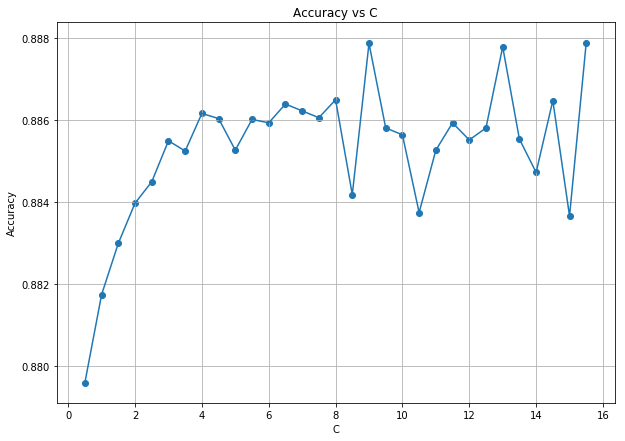

In [13]:
plt.figure(figsize=(10,7))
plt.plot(c, accuracy)
plt.scatter(c, accuracy)
plt.title('Accuracy vs C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

#### Evaluating Performance

In [14]:
print(classification_report(y_test,y_predicted))

             precision    recall  f1-score   support

          0       0.89      0.89      0.89     23916
          1       0.89      0.89      0.89     24083

avg / total       0.89      0.89      0.89     47999



In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score
k_fold = KFold(n_splits=5)

In [16]:
cross_val_score(linear_svm_classifier,X,y,cv=k_fold,scoring='accuracy',n_jobs=-1)
# array([ 0.8525    ,  0.78833714,  0.85724554,  0.82521329,  0.79636864])

array([ 0.818625  ,  0.80780649,  0.89365293,  0.82686959,  0.69105285])

In [17]:
## Yet to run with openCloseData9.csv

# c = list(np.arange(0.1, 1.0, 0.050))
# accuracy = []
# y_predicted = np.zeros((y_test.shape))
# max_accuracy = 0.0
# linear_svm_classifier = LinearSVC()

# for i in c:
#     classifier = LinearSVC(C = i)
#     classifier.fit(X_train, y_train)
#     predicted_y = classifier.predict(X_test)
#     accuracy.append(np.mean(y_test==predicted_y))
#     print('Accuracy for C = {:.2f} is : {:.4f}'.format(i, accuracy[-1]))
#     if(accuracy[-1] > max_accuracy):
#         y_predicted = predicted_y
#         max_accuracy = accuracy[-1]
#         linear_svm_classifier = classifier

### Training RBF kernel

In [17]:
from sklearn.svm import SVC

In [18]:
rbf_svm_classifier = SVC(kernel = 'rbf')
rbf_svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
predicted_y = rbf_svm_classifier.predict(X_test)
print('Accuracy: ' + str(np.mean(y_test==predicted_y)))
print(classification_report(y_test,predicted_y))
# Accuracy: 0.904289672702
#              precision    recall  f1-score   support

#           0       0.91      0.90      0.90     24085
#           1       0.90      0.91      0.90     23914

# avg / total       0.90      0.90      0.90     47999

Accuracy: 0.906893893623
             precision    recall  f1-score   support

          0       0.91      0.90      0.91     23916
          1       0.90      0.91      0.91     24083

avg / total       0.91      0.91      0.91     47999



In [ ]:
# cross_val_score(rbf_svm_classifier,X,y,cv=k_fold,scoring='accuracy',n_jobs=-1)

#### Trying different values of C

In [20]:
c_rbf = list(np.arange(2, 11))
accuracy_rbf = []
y_predicted = np.zeros((y_test.shape))
max_accuracy_rbf = 0.0
rbf_svm_classifier = SVC(kernel = 'rbf')

for i in c_rbf:
    classifier = SVC(kernel = 'rbf', C = i)
    classifier.fit(X_train, y_train)
    predicted_y = classifier.predict(X_test)
    accuracy_rbf.append(np.mean(y_test==predicted_y))
    print('Accuracy for C = {:.2f} is : {:.4f}'.format(i, accuracy_rbf[-1]))
    if(accuracy_rbf[-1] > max_accuracy_rbf):
        y_predicted = predicted_y
        max_accuracy_rbf = accuracy_rbf[-1]
        rbf_svm_classifier = classifier


Accuracy for C = 2.00 is : 0.9100
Accuracy for C = 3.00 is : 0.9109
Accuracy for C = 4.00 is : 0.9115
Accuracy for C = 5.00 is : 0.9120
Accuracy for C = 6.00 is : 0.9120
Accuracy for C = 7.00 is : 0.9122
Accuracy for C = 8.00 is : 0.9127
Accuracy for C = 9.00 is : 0.9130
Accuracy for C = 10.00 is : 0.9130


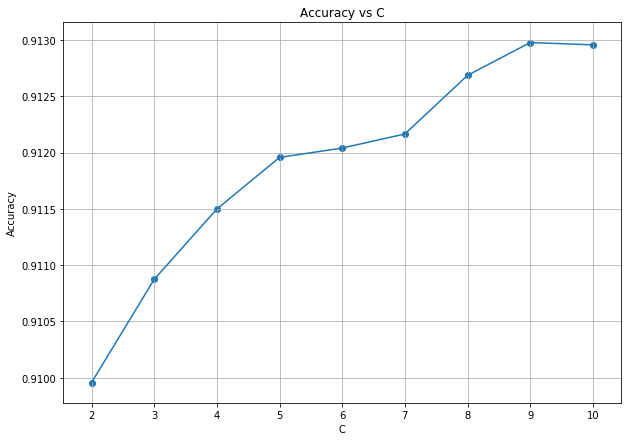

In [21]:
plt.figure(figsize=(10,7))
plt.plot(c_rbf, accuracy_rbf)
plt.scatter(c_rbf, accuracy_rbf)
plt.title('Accuracy vs C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [22]:
print(classification_report(y_test,y_predicted))

             precision    recall  f1-score   support

          0       0.92      0.91      0.91     23916
          1       0.91      0.92      0.91     24083

avg / total       0.91      0.91      0.91     47999



### Training poly kernel

In [23]:
poly_svm_classifier = SVC(kernel = 'poly')
poly_svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
predicted_y = poly_svm_classifier.predict(X_test)
print('Accuracy: ' + str(np.mean(y_test==predicted_y)))
print(classification_report(y_test,predicted_y))
# Accuracy: 0.878101627117
#              precision    recall  f1-score   support

#           0       0.86      0.91      0.88     24085
#           1       0.90      0.85      0.87     23914

# avg / total       0.88      0.88      0.88     47999

Accuracy: 0.880997520782
             precision    recall  f1-score   support

          0       0.86      0.91      0.88     23916
          1       0.91      0.85      0.88     24083

avg / total       0.88      0.88      0.88     47999



In [26]:
# cross_val_score(poly_svm_classifier,X,y,cv=k_fold,scoring='accuracy',n_jobs=-1)

#### Using sigmoid kernel

In [28]:
# sigmoid_svm_classifier = SVC(kernel = 'sigmoid')
# sigmoid_svm_classifier.fit(X_train, y_train)

In [29]:
# predicted_y = sigmoid_svm_classifier.predict(X_test)
# print('Accuracy: ' + str(np.mean(y_test==predicted_y)))
# print(classification_report(y_test,predicted_y))